In [6]:
from src.graph import graph_loader, create_polarized_graph, spectral_bipartition_coloring, random_color_graph
from src.seed import seed_degree, seed_random 

In [15]:
import pandas as pd

In [16]:
from icm_diffusion import simulate_diffusion_ICM


In [17]:
G = graph_loader('datasets/congress_network/congress.edgelist')
#color the graph
spectral_bipartition_coloring(G)

Number of Nodes: 475
Number of Edges: 13289


/Users/quenzer/miniforge3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


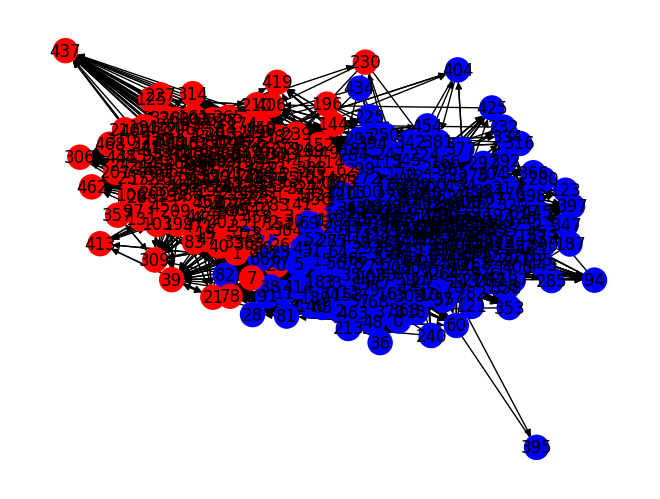

In [21]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a copy of the graph
G_copy = G.copy()

# Set the node colors based on the "color" attribute
node_colors = ["red" if G_copy.nodes[node]["color"] == 1 else "blue" for node in G_copy.nodes()]

# Draw the graph with the updated node colors
pos = nx.spring_layout(G_copy)
nx.draw(G_copy, pos, with_labels=True, node_color=node_colors)

# Show the plot
plt.show()


In [19]:
count, count_std, color_count, color_count_std = simulate_diffusion_ICM(G, seeds, 1, 2000)
results = pd.DataFrame({
    'Metric': ['Count', 'Count Standard Deviation', 'Color Count', 'Color Count Standard Deviation'],
    'Value': [round(count, 3), round(count_std, 3), round(color_count, 3), round(color_count_std, 3)]
})

results

100%|██████████| 2000/2000 [00:04<00:00, 462.87it/s]


,Metric,Value
0,Count,201.361
1,Count Standard Deviation,60.604
2,Color Count,27.989
3,Color Count Standard Deviation,16.387
